# ПРОЕКТ "Принятие решений в бизнесе"

# Описание проекта:
**В данном проете мне, как аналитику крупного интернет - магазина, предстоит изучить сформулированные совместно с отделом маркетинга гипотезы, приоритизировать их, запустите A/B-тест и проанализировать его результаты.**

Гипотезы будем приоритизировать двумя методами: без учёта обхвата и с учётом обхвата пользователй.

Запуск А/В теста будем проводить на основе "сырых" и "очищенных" данных. Для этого предварительно проведём анализ данных с целью выявления экстремальных значений.

В результате проекта должны быть сделаны выводи о результате проведения теста и выдвинуты рекомендации для бизнеса

## Приоритизация гипотез.

### Подготовка данных

#### Откроем файл с данными

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
display (data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


#### Переименуем столбцы (переведём названия в нижний регистр)

In [3]:
data.columns= data.columns.str.lower()

### Применим метод ICE для приоритезации гипотез. Выведем таблицу сo столбцами названия гипотез и их приоритетом

In [4]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
pd.options.display.max_colwidth = 120
display(data[{'hypothesis','ICE'}].sort_values(by = 'ICE', ascending = False))


,ICE,hypothesis
8,16.200000,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.333333,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.200000,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.000000,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.000000,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.000000,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.333333,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.125000,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.000000,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


**Вывод: Наиболее приоритетны следующие гипотезы:**
 * 'Запустить акцию, дающую скидку на товар в день рождения' (№9)
 * 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'(№1) 
 *'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' (№8).

### Применим метод RICE для приоритезации гипотез. Выведем таблицу сo столбцами названия гипотез и их приоритетом

In [5]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
pd.options.display.max_colwidth = 120
display(data[{'hypothesis','RICE'}].sort_values(by = 'RICE', ascending = False))

,RICE,hypothesis
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


**Вывод: Исходя из результатов этого метода - наиболее перспективны восьмая,третья, первая и седьмая гипотезы. Такая разница с результатами первого метода объясняется показателем Reach, который имеет максимальное значение у восьмой гипотезы. Очень важно учитывать, как много пользователей завтронет гипотеза. Для девятой гипотезы этот параметр очень мал, может гипотеза и является очень перспективной, но если она практически ни на кого не повлияет, то стоит ли тратить время на её исследование?!Гипотеза №3'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа' не самая перспективная, но каcается очень многих пользователей. Её, возможно, тоже следует рассмотреть. По результатам обоих методов приоритизации можно утверждать, что в первую очередь стоит обратить внимание на гипотезу под номером 8:'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' **

## Анализ А/Б теста

### Подготовка данных для анализа

#### Откроем и изучим файлы с данными

In [6]:
orders = pd.read_csv('/datasets/orders.csv') 
visitors = pd.read_csv('/datasets/visitors.csv')
print(orders.head(5))
print(visitors.head(5))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [7]:
print ('Количество дубликтов в данных с покупками',orders.duplicated().sum())
print ('Количество дубликтов в данных с клиентами',visitors.duplicated().sum())
datesGroups = orders[['date', 'group']].drop_duplicates()

Количество дубликтов в данных с покупками 0
Количество дубликтов в данных с клиентами 0


In [8]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


### Построим график кумулятивной выручки по дням

#### Изучим данные 

In [10]:
# Посмотрим сколько групп в А/В тесте
print('Группы',orders['group'].unique())
#Даты начала и окончания теста
print ('Дата начала теста', orders['date'].min())
print ('Дата окончания теста', orders['date'].max())
#Определим сколько пользователей в каждой группе
print ('Количество пользователей в группе А', orders.query('group== "A"')['visitorId'].count())

print ('Количество пользователей в группе B',  orders.query('group== "B"')['visitorId'].count())
#Определим не попадают ли какие-то пользователи в обе группы:
count = 0
for el in orders.query('group== "A"')['visitorId'].unique() :
    if el == orders.query('group== "B"')['visitorId'].unique().all():
        count = count+1
print('Количество одинаковых пользователей в обеих группах:',count)

Группы ['B' 'A']
Дата начала теста 2019-08-01 00:00:00
Дата окончания теста 2019-08-31 00:00:00
Количество пользователей в группе А 557
Количество пользователей в группе B 640
Количество одинаковых пользователей в обеих группах: 0


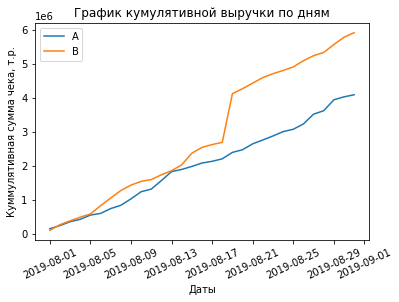

In [11]:
register_matplotlib_converters()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 25)
plt.title ('График кумулятивной выручки по дням')
plt.xlabel('Даты')
plt.ylabel('Куммулятивная сумма чека, т.р.')
plt.legend() 

**Вывод:По графику видно, что группа В показывает устойчивый рост куммулятивной выручки по дням относительно группы А , начиная с 5 августа 2019 г. 13.08.2019 произошёл незначительный скачок роста показателя у группы А,что привело к равенству куммулятивной выручки на этот день, но далее группа В стала лидировать. с 17.08 по 21 августа куммулятивная выручка группы В резко выросла,возможно в эти дни были совершены самые дорогостоящие покупки. Позже рост стабилизировался, что может говорить о достаточном сроке проведения эксперимента.**

### Построим график кумулятивного чека по дням

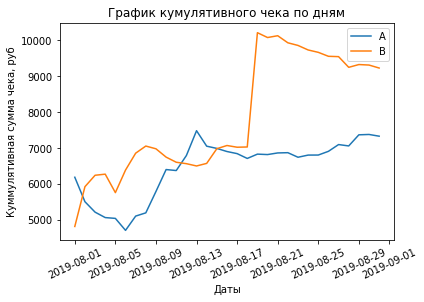

In [12]:

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation = 25)
plt.title ('График кумулятивного чека по дням')
plt.xlabel('Даты')
plt.ylabel('Куммулятивная сумма чека, руб')
plt.legend() 


**Вывод: Куммулятивный чек группы В больше, чем группы А, но на графике видны сильные колебания: резкий "всплеск" у группы А 13.08.2019 г и у группы В 18-19.09.2019 г. Скорее всего в эти дни были совершены особо крупные покупки,которые случаются нечасто. После "всплеска" показатель группы В начал устойчиво снижаться,в  то время,как группа А показывает маленький, но стабильный прирост. На протяжении послдених 4х дней картина стабилизировалась: кумулятивный чек по дням группы В значительно выше и практически ен менеятся, так же, как и у группы А**

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Text(0, 0.5, 'Разница куммулятивной суммы  чека')

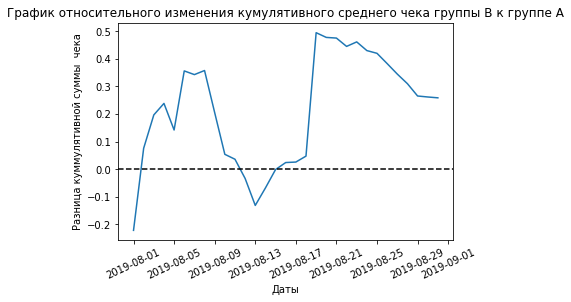

In [13]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation = 25)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title ('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Разница куммулятивной суммы  чека')


**Вывод: На этом графике так же видно, что относительное изменения кумулятивного среднего чека группы B к группе A на протяжении всего срока эксперимента выше, за исключением первого дня и 13.08.2019г. Последнии дни этот показатель стабильно положительный**

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 

(18109.0, 18140.0, 0.0, 0.05)

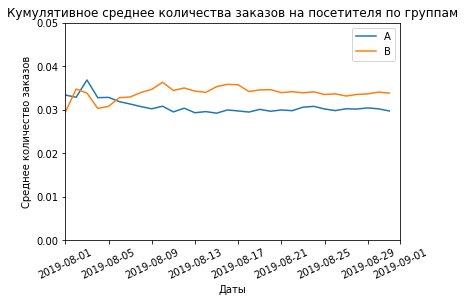

In [14]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title ('Кумулятивное среднее количества заказов на посетителя по группам')
plt.xlabel('Даты')
plt.ylabel('Среднее количество заказов')
plt.xticks(rotation = 25)

plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05]) 


**Вывод: По графику видно, что начиная с 5 августа 2019 г среднее число заказов у группы В стабильно больше, чем у группы А.**

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

(18109.0, 18140.0, -0.3, 0.3)

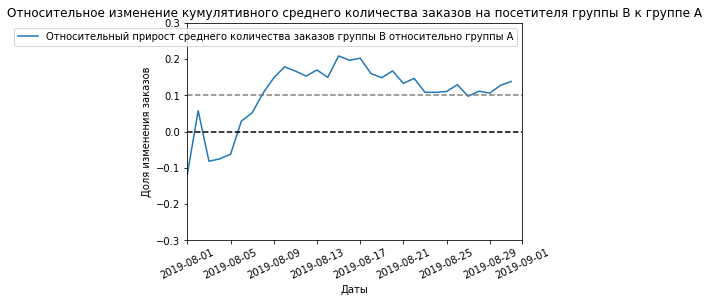

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов группы B относительно группы A")
plt.legend()
plt.xticks(rotation = 25)
plt.title ('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Доля изменения заказов')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3]) 

**Вывод: начиная с 05.08.2019 конверсия группы В становится лучше и лучше относительно конверсии группы А. После некоторого спада конверсии группы В с 15 по 22 августа, она звфиксировалась около 10 % прироста относительно группы А и после 29.08.2019 ночала снова расти.Положительная тенденция налицо** 

### Построим точечный график количества заказов по пользователям. 

#### Создадим таблицу с двумя столбцами - ID пользователей и количеством их заказов

In [16]:
ordersByUsers  = orders.groupby( 'visitorId',as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers.columns = ['userId' , 'orders']
ordersByUsers.sort_values(by='orders',ascending=False) 

print(ordersByUsers .head(10))

     userId  orders
0   5114589       1
1   6958315       1
2   8300375       2
3  11685486       1
4  39475350       1
5  47206413       1
6  48147722       1
7  54447517       1
8  56960363       1
9  66685450       1


#### Построим точечный график

Text(0, 0.5, 'Количество заказов')

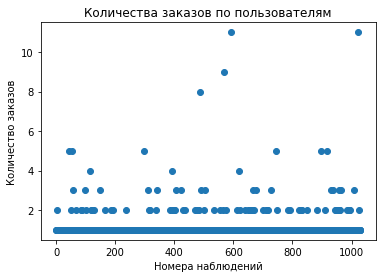

In [17]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title ('Количества заказов по пользователям')
plt.xlabel('Номера наблюдений')
plt.ylabel('Количество заказов')


**Вывод: По графику видно, что очень много пользователй совершили всего один заказ. Есть весомое количество пользователей,которые совершали покупку 2 -3 раза. Количество пользователей, совершивших более 4х заказов, крайне мало.**

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [18]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Вывод: не более 5% пользователей совершают больше 2х заказов и всего 1% - больше 4х**

### Построим точечный график стоимостей заказов

Text(0, 0.5, 'Стоимость заказов, т.р.')

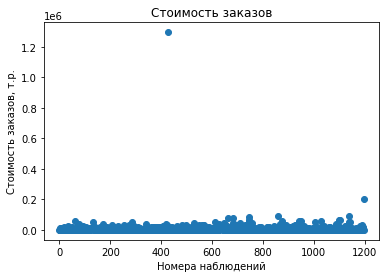

In [19]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title ('Стоимость заказов')

plt.xlabel('Номера наблюдений')
plt.ylabel('Стоимость заказов, т.р.')

**Вывод:Два заказа явно выделяются совей аномально большой стоимостью. Особенно не ваисывается в общую картину заказ, стоимостью более 120 т.р., когда абсолютное большинство чеков ниже 20 т.р.**

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [20]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


**Вывод:5% заказов стоимостью больше 28000 руб. и всего 1% - дороже 58233 рублей**

**Вывод: исходя из полученных данных считаю рациональным очистить данные от одного процента стоимости заказов, ограничив выборку по значению 99 перцентиля в 28 т.р., а количество заказов ограничить значением 95 перцентиля - 2 заказами** 

In [21]:
cost = round(np.percentile(orders['revenue'], [99])[0],2)
count = np.percentile(ordersByUsers['orders'],[95])[0]
print('Ограничение по стоимости заказов:',cost)
print('Ограничение по количеству заказов:',count)

Ограничение по стоимости заказов: 58233.2
Ограничение по количеству заказов: 2.0


### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

#### Сформулируем гипотезы

H0 - Нулевая гипотеза: Если добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, и делать рассылки с выгодными предложениями раз в пару дней, то это не приведёт к увеличению заказов.
    
Н1 - Альтернативная гипотеза: Если добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, и делать рассылки с выгодными предложениями раз в пару дней, то количество заказов увеличится

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId','revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
  
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 
display('P-value = {0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
display('Относительный прирост среднего группы В к конверсии группы А = {0:.3f}'.format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)) 

'P-value = 0.01679'

'Относительный прирост среднего группы В к конверсии группы А = 0.138'

**Вывод:P-value меньше 0.05, значит нулевую гипотезу следует отвергнуть.Анализ сырых данных говорит о том, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов группы В к  среднему количеству заказов группы А равен 13,8%**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [23]:
print('P-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B ={0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value = 0.729
Относительный прирост среднего чека группы B =0.259


**Вывод:P-value больше 0.5 - статистически значимых отличий в среднем чеке между группами нет. При этом относительное различие среднего чека между группами - 25,9%. Видимо в данных есть сильные выбросы.**

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Так как значения  95-ого и 99-ого перцентиля стоимости заказов соответственно равны 28000 руб  58233,2 руб, а 95-й и 99-й перцентили количества заказов на пользователя равны 2 и 4 соответственно, считаю, что в "очищенные данные" должны войти заказы со стоимостью меньше 30000 руб и количество заказов на пользователя не должно быть болше 3. Так мы уберём от 1%-5% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

#### Составим таблицу с "очищенными" данными

In [24]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > count]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > count]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] >= cost]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64


#### Рассчитаем показатели

In [25]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value = {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего группы В к группе А ={0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value = 0.01007
Относительный прирост среднего группы В к группе А =0.174


**Вывод:Как и в случае с сырыми данными статистическая значимость достигнута, сегмен B показывает относительный прирост на 14,8% лучшую, чем группа А. После "очистки" данных этот показатель увеличился на 1%**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [26]:
print(
    'P-value {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B ={0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


P-value 0.798
Относительный прирост среднего чека группы B =-0.020


**Вывод:P-value вырос по сравнению с "сырыми" данными -  статистически значимых отличий в среднем чеке между группами нет. При этом относительное различие среднего чека между группами после удаления 'вбросов' снизилось на 26,1% и стало отрицательным  = - 2%. Верояно, в изначальных данных аномально крупные чеки встречались именно в группе В**

# Итоговый вывод:

Самой приоритетной гипотезой считаю гипотезу № 8 "Добавить форму подписки на все основные страницы"

Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по «сырым», так и по "очищенным" данным.

По среднему чеку между группами нет статистически значимого различия. 

График кумулятивного среднего количества заказов на посетителя по группам явно говорит о том, что результаты группы B стабильно лучше группы A.

**По результатам А/В теста можно сделать вывод о том, что группа В устойчиво показывает лучший результат по количеству чеков.Тест можно закончить и признать его успешным, а группу В признать победителем. Можно рекомендовать вносить изменения на сайт.**